In [1]:
from numpy import * #mathmetical library
from tqdm import tqdm #progressbar

import matplotlib.pyplot as plt #plotting graph
import matplotlib.style as style

style.use("fivethirtyeight")

In [2]:
#declaring the sigmoid function cum the derivative function
def sigmoid_func(x, deriv=False):
    if deriv==True:
        return x*(1-x)
    return 1/(1+exp(-x))

In [3]:
#declaring the training function
def training_func(x, y, iterations, syn0, syn1):
    '''
    here:
    x = input
    y = output labels
    iterations = total iterations
    syn0 = synapse 1
    syn1 = synapse 2
    
    '''
    
    error_vals = [] #storing the errors
    for i in tqdm(range(iterations)):
        l0 = x
        l1 = sigmoid_func(dot(l0, syn0))
        l2 = sigmoid_func(dot(l1, syn1))
        
        #calculating the error
        error = y - l2
        if i%1000 == 0:
            error_vals.append(mean(abs(error)))
        
        l2_delta = error*sigmoid_func(l2, deriv=True)
        l1_error = l2_delta.dot(syn1.T)
        l1_delta = l1_error*sigmoid_func(l1, deriv=True)
        
        #updating synapse
        syn0 += l0.T.dot(l1_delta)
        syn1 += l1.T.dot(error)
    
    return (error_vals, l2)

        

In [4]:
#plotting the errors
def plot_func(errors):
    val = []
    for i in range(len(errors)):
        val.append(i)
    axes = plt.gca()
    axes.set_ylim([0.0, 0.007])
    plt.plot(val, errors, marker='o')
    plt.show()

In [5]:
#the main function
def main():
    x = array([[0,1,0,1],
        [1,1,0,1],
        [0,1,1,0], 
        [1,1,1,0]])
    y = array([[1], [0], [0], [1]])
    
    syn0 = 2*random.random((4,4)) - 1
    syn1 = 2*random.random((4,1)) - 1
    
    errors, op = training_func(x, y , 60000, syn0, syn1)
    print("the output we get :",op)
    plot_func(errors)

100%|█████████████████████████████| 60000/60000 [00:02<00:00, 25877.14it/s]


the output we get : [[  9.99892715e-01]
 [  9.26275034e-05]
 [  9.03508631e-05]
 [  9.99898123e-01]]


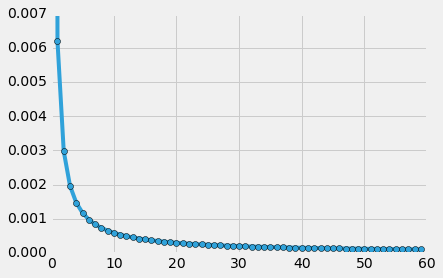

In [6]:
main()

As we see the result we get is super close to the output we provided!!

NOTE : ne-01 = n*0.1
       
       ne-05 = n*0.00001

And the error function also decreases to super min value close to 0...